# Regcoil
Stellacode includes the [regcoil](https://github.com/landreman/regcoil) algorithm for finding the optimal current density for reproducing a given magnetic field from a given coil surface.

In [1]:
from stellacode.costs import EMCost
from stellacode.surface import IntegrationParams
from stellacode.surface import WrappedCoil
from stellacode.tools.plots import plot_j2D_CWS

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


The first step is to choose a plasma configuration and create the regcoil solver object. Some predefined configuration are available in stellacode. Let's choose the W7X configuration.

In [2]:
from stellacode.definitions import w7x_plasma
plasma_config = w7x_plasma

In [3]:
em_cost = EMCost.from_plasma_config(
    plasma_config=w7x_plasma,
    integration_par=IntegrationParams(num_points_u=16, num_points_v=16*5),
)

Plot a field period of the LCFS

In [4]:
em_cost.Sp.plotly_plot()

Plot the whole LCFS

In [5]:
em_cost.Sp.plotly_plot(nfp=em_cost.Sp.nfp)

Then we can build a coil factory (a class used to create coil objects):

In [15]:
coil_factory = WrappedCoil.from_plasma(
    surf_plasma=em_cost.Sp,
    surf_type="toroidal",
    n_harmonics=16,
    factor=4,
)

Then we can build the coil operator, which is a linear operator acting on current parameters and returning a current object:

In [16]:
coil_op = coil_factory()

We can retrieve the current parameters and use them to build a coil surface:

Then we can solve for the value of $\lambda$ given to EMCost

In [17]:
em_cost.lamb = 1e-30
cost, metrics, results, S = em_cost.cost(coil_op)
metrics

{'max_deltaB_normal': Array(0.00752411, dtype=float32),
 'deltaB_B_L2': Array(111.37266, dtype=float32),
 'deltaB_B_max': Array(59.65155, dtype=float32),
 'cost_B': Array(0.03610262, dtype=float32),
 'em_cost': Array(0.03610262, dtype=float32),
 'cost_J': Array(1.0751534e+20, dtype=float32),
 'max_j': Array(2.6905787e+09, dtype=float32)}

In [18]:
coil_surface = coil_op.get_coil(results.phi_mn_wnet_cur)

Then we can plot the current obtained over the CWS in 3D

In [39]:
coil_surface.plotly_plot(
    vector_field=coil_surface.j_3d,
    reduce_res=2,
    cone_kwargs=dict(
        sizeref=10,
        colorscale="Viridis"),
    scale=True,
    colormap="Reds"
)

Or plot the current obtained in 2D unwrapping the CWS

(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': 'Current over the unwrapped coil winding surface'}, xlabel='v', ylabel='u'>)

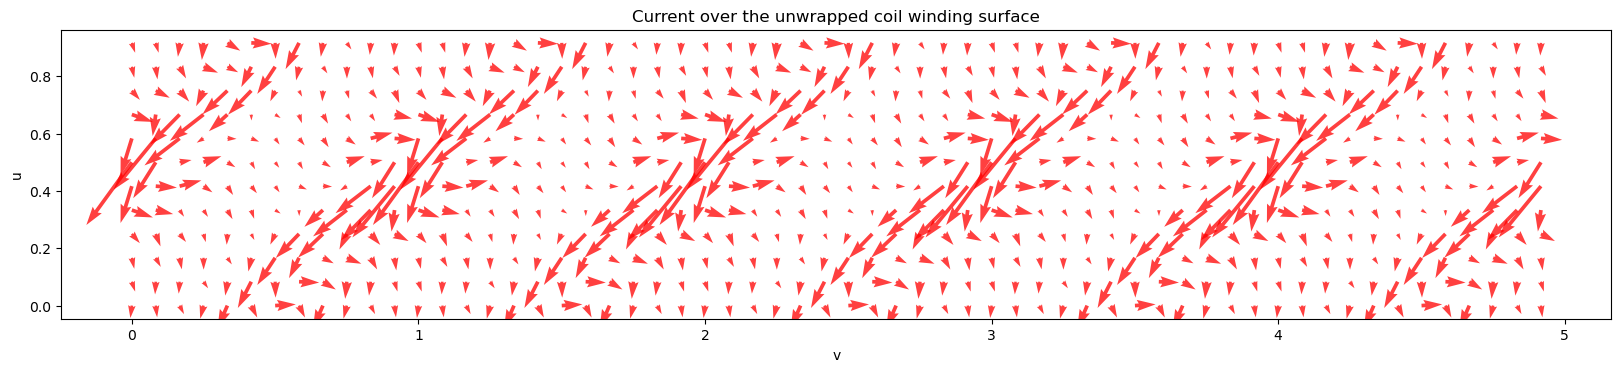

In [11]:
plot_j2D_CWS(coil_surface)